<a href="https://colab.research.google.com/github/katemanee006/DADS-6003/blob/main/ML_6610422006_As02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance

In [27]:
import yfinance as yf

In [28]:
# Technical Indicators
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib

--2024-02-24 12:16:08--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-24 12:16:08--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-24 12:16:08--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [29]:
# Data Manipulation
import numpy as np
import pandas as pd

In [30]:
HIG = yf.Ticker('HIG')
interval = '1h'
start = '2023-01-01'
end = '2024-02-15'
HIG_price_df = HIG.history(interval=interval,start=start,end=end)
HIG_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,75.674004,75.760002,75.040001,75.389999,172744,0.0,0.0
2023-01-03 10:30:00-05:00,75.410004,75.750000,75.160004,75.330002,155637,0.0,0.0
2023-01-03 11:30:00-05:00,75.320000,75.320000,74.849998,74.860001,93202,0.0,0.0
2023-01-03 12:30:00-05:00,74.889999,75.164497,74.699997,75.089996,77399,0.0,0.0
2023-01-03 13:30:00-05:00,75.070000,75.279999,74.839996,74.879997,114202,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-14 11:30:00-05:00,91.425003,91.514999,91.080002,91.095001,98766,0.0,0.0
2024-02-14 12:30:00-05:00,91.095001,91.274803,91.080002,91.269997,83672,0.0,0.0
2024-02-14 13:30:00-05:00,91.288597,91.404999,91.139999,91.370003,120343,0.0,0.0


In [31]:
# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [32]:
HIG_price_df['S_14'] = HIG_price_df['Close'].rolling(window=14).mean()
HIG_price_df['Corr'] = HIG_price_df['Close'].rolling(window=14).corr(HIG_price_df['S_14'])
HIG_price_df['RSI'] = ta.RSI(np.array(HIG_price_df['Close']), timeperiod =14)
HIG_price_df['Open-Close'] = HIG_price_df['Open'] - HIG_price_df['Close'].shift(1)
HIG_price_df['Open-Open'] = HIG_price_df['Open'] - HIG_price_df['Open'].shift(1)
HIG_price_df = HIG_price_df.dropna()
X = HIG_price_df.iloc[:,:9]
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_14,Corr
Datetime,,,,,,,,,
2023-01-06 14:30:00-05:00,79.160004,79.440002,79.150002,79.254997,185499,0.0,0.0,77.710000,0.925466
2023-01-06 15:30:00-05:00,79.260002,79.370003,78.830002,78.889999,371125,0.0,0.0,77.857857,0.911100
2023-01-09 09:30:00-05:00,78.339996,78.529999,77.889999,78.150002,269983,0.0,0.0,77.967143,0.832268
2023-01-09 10:30:00-05:00,78.135002,78.190002,77.720001,78.169998,192632,0.0,0.0,78.125000,0.722300
2023-01-09 11:30:00-05:00,78.180000,78.570000,78.160004,78.309998,143674,0.0,0.0,78.268214,0.598564
...,...,...,...,...,...,...,...,...,...
2024-02-14 11:30:00-05:00,91.425003,91.514999,91.080002,91.095001,98766,0.0,0.0,90.860358,-0.694061
2024-02-14 12:30:00-05:00,91.095001,91.274803,91.080002,91.269997,83672,0.0,0.0,90.827500,-0.630527
2024-02-14 13:30:00-05:00,91.288597,91.404999,91.139999,91.370003,120343,0.0,0.0,90.810714,-0.574720


In [33]:
HIG_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_14,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,,,,
2023-01-06 14:30:00-05:00,79.160004,79.440002,79.150002,79.254997,185499,0.0,0.0,77.710000,0.925466,78.875675,-0.019997,-0.059998
2023-01-06 15:30:00-05:00,79.260002,79.370003,78.830002,78.889999,371125,0.0,0.0,77.857857,0.911100,71.948206,0.005005,0.099998
2023-01-09 09:30:00-05:00,78.339996,78.529999,77.889999,78.150002,269983,0.0,0.0,77.967143,0.832268,60.371426,-0.550003,-0.920006
2023-01-09 10:30:00-05:00,78.135002,78.190002,77.720001,78.169998,192632,0.0,0.0,78.125000,0.722300,60.556122,-0.014999,-0.204994
2023-01-09 11:30:00-05:00,78.180000,78.570000,78.160004,78.309998,143674,0.0,0.0,78.268214,0.598564,61.895134,0.010002,0.044998
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-14 11:30:00-05:00,91.425003,91.514999,91.080002,91.095001,98766,0.0,0.0,90.860358,-0.694061,56.725064,-0.004997,-0.039993
2024-02-14 12:30:00-05:00,91.095001,91.274803,91.080002,91.269997,83672,0.0,0.0,90.827500,-0.630527,58.676518,0.000000,-0.330002
2024-02-14 13:30:00-05:00,91.288597,91.404999,91.139999,91.370003,120343,0.0,0.0,90.810714,-0.574720,59.792390,0.018600,0.193596


In [34]:
y = np.where(HIG_price_df['Close'].shift(-1) > HIG_price_df['Close'],1,-1)

In [35]:
split = int(0.7*len(HIG_price_df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


In [36]:
model = LogisticRegression(max_iter=1000)
model = model.fit (X_train,y_train)

In [37]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.0002476383243965046]
1,High,[-0.00025156479906162537]
2,Low,[-0.000248448574644133]
3,Close,[-0.00025182181961253436]
4,Volume,[4.0091197851167385e-07]
5,Dividends,[7.459604295216154e-08]
6,Stock Splits,[0.0]
7,S_14,[-0.000245197533537353]
8,Corr,[-4.888271163697925e-06]


In [38]:
prediction_date = '2024-02-25'
probability = model.predict_proba(X_test)
print(probability)

[[0.50434662 0.49565338]
 [0.50058981 0.49941019]
 [0.48027306 0.51972694]
 ...
 [0.51631256 0.48368744]
 [0.51192669 0.48807331]
 [0.49795012 0.50204988]]


In [39]:
predicted = model.predict(X_test)
print (predicted)

[-1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1
  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1
 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1
 -1 -1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1

In [40]:
print(metrics.confusion_matrix(y_test, predicted))

[[231  47]
 [241  61]]


In [41]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.49      0.83      0.62       278
           1       0.56      0.20      0.30       302

    accuracy                           0.50       580
   macro avg       0.53      0.52      0.46       580
weighted avg       0.53      0.50      0.45       580



In [42]:
print(model.score(X_test,y_test))

0.503448275862069


<ipython-input-43-87fbf18aaf75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HIG_price_df['Predicted_Signal'] = model.predict(X)
<ipython-input-43-87fbf18aaf75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HIG_price_df['HIG_returns'] = np.log(HIG_price_df['Close']/HIG_price_df['Close'].shift(1))
<ipython-input-43-87fbf18aaf75>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

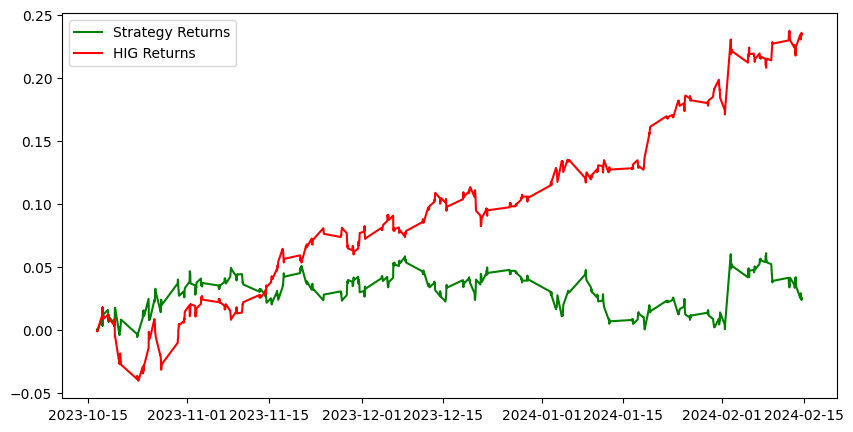

In [43]:
HIG_price_df['Predicted_Signal'] = model.predict(X)
HIG_price_df['HIG_returns'] = np.log(HIG_price_df['Close']/HIG_price_df['Close'].shift(1))
Cumulative_HIG_returns = np.cumsum(HIG_price_df[split:]['HIG_returns'])


HIG_price_df['Strategy_returns'] = HIG_price_df['HIG_returns']* HIG_price_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(HIG_price_df[split:]['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_HIG_returns, color='r', label = 'HIG Returns')
plt.legend()
plt.show()

In [44]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.50515464 0.5        0.50515464 0.50259067 0.50259067 0.50259067
 0.50777202 0.50259067 0.50259067 0.50259067]
0.5033625340526682


<ipython-input-45-9f4b7cd9af98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HIG_price_df['Predicted_Signal'] = model.predict(X)
<ipython-input-45-9f4b7cd9af98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HIG_price_df['HIG_returns'] = np.log(HIG_price_df['Close']/HIG_price_df['Close'].shift(1))
<ipython-input-45-9f4b7cd9af98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

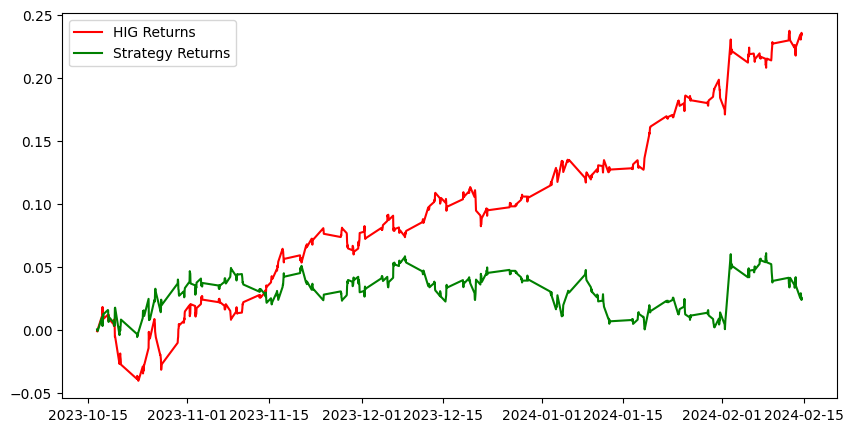

In [45]:
HIG_price_df['Predicted_Signal'] = model.predict(X)
HIG_price_df['HIG_returns'] = np.log(HIG_price_df['Close']/HIG_price_df['Close'].shift(1))
Cumulative_HIG_returns = np.cumsum(HIG_price_df[split:]['HIG_returns'])

HIG_price_df['Startegy_returns'] = HIG_price_df['HIG_returns']* HIG_price_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(HIG_price_df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_HIG_returns, color='r',label = 'HIG Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [46]:
from posixpath import splitdrive
NDX = yf.Ticker('^NDX')
interval = '1h'
start = '2023-01-01'
end = '2024-02-15'
NDX_price_df = NDX.history(interval=interval,start=start,end=end)
NDX_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,11031.634766,11091.424805,10848.967773,10861.505859,0,0.0,0.0
2023-01-03 10:30:00-05:00,10856.330078,10901.798828,10817.180664,10834.069336,139068280,0.0,0.0
2023-01-03 11:30:00-05:00,10833.132812,10833.132812,10778.954102,10794.881836,111608453,0.0,0.0
2023-01-03 12:30:00-05:00,10794.948242,10824.410156,10770.957031,10820.927734,89229087,0.0,0.0
2023-01-03 13:30:00-05:00,10821.043945,10846.152344,10808.379883,10824.702148,82454276,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-14 11:30:00-05:00,17678.892578,17692.248047,17619.921875,17686.408203,74016547,0.0,0.0
2024-02-14 12:30:00-05:00,17688.281250,17713.800781,17670.837891,17685.851562,71963075,0.0,0.0
2024-02-14 13:30:00-05:00,17686.986328,17736.763672,17662.937500,17705.498047,68913185,0.0,0.0


In [47]:

NDX_price_df['S_14'] = NDX_price_df['Close'].rolling(window=14).mean()
NDX_price_df['Corr'] = NDX_price_df['Close'].rolling(window=14).corr(NDX_price_df['S_14'])
NDX_price_df['RSI'] = ta.RSI(np.array(NDX_price_df['Close']), timeperiod =14)
NDX_price_df['Open-Close'] = NDX_price_df['Open'] - NDX_price_df['Close'].shift(1)
NDX_price_df['Open-Open'] = NDX_price_df['Open'] - NDX_price_df['Open'].shift(1)
NDX_price_df = NDX_price_df.dropna()
X1 = NDX_price_df.iloc[:,:9]
X1

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_14,Corr
Datetime,,,,,,,,,
2023-01-06 14:30:00-05:00,11027.521484,11082.317383,11025.058594,11054.332031,122319803,0.0,0.0,10862.372140,0.022630
2023-01-06 15:30:00-05:00,11054.574219,11072.946289,11030.070312,11035.409180,127431361,0.0,0.0,10870.684222,0.173935
2023-01-09 09:30:00-05:00,11131.876953,11245.227539,11122.362305,11226.004883,0,0.0,0.0,10901.108050,0.615104
2023-01-09 10:30:00-05:00,11224.233398,11304.333008,11224.233398,11294.875000,143913018,0.0,0.0,10938.485073,0.793432
2023-01-09 11:30:00-05:00,11295.790039,11300.844727,11272.351562,11289.509766,102669260,0.0,0.0,10974.928292,0.839654
...,...,...,...,...,...,...,...,...,...
2024-02-14 11:30:00-05:00,17678.892578,17692.248047,17619.921875,17686.408203,74016547,0.0,0.0,17715.786691,0.505645
2024-02-14 12:30:00-05:00,17688.281250,17713.800781,17670.837891,17685.851562,71963075,0.0,0.0,17694.771624,0.419185
2024-02-14 13:30:00-05:00,17686.986328,17736.763672,17662.937500,17705.498047,68913185,0.0,0.0,17680.879464,0.272365


In [48]:
y1 = np.where(NDX_price_df['Close'].shift(-1) > NDX_price_df['Close'],1,-1)

In [49]:
split = int(0.7*len(NDX_price_df))
X1_train, X1_test, y1_train, y1_test = X1[:split], X1[split:], y1[:split], y1[split:]

In [50]:
model = LogisticRegression()
model = model.fit (X1_train,y_train)

In [51]:
pd.DataFrame(zip(X1.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-2.076235181099107e-12]
1,High,[-2.0966438249508523e-12]
2,Low,[-2.0428022666866675e-12]
3,Close,[-2.0658292451912734e-12]
4,Volume,[-4.388256434971061e-11]
5,Dividends,[0.0]
6,Stock Splits,[0.0]
7,S_14,[-2.05869687637271e-12]
8,Corr,[-1.8011486047502501e-16]


In [52]:
prediction_date = '2024-02-28'
probability = model.predict_proba(X1_test)
print(probability)

[[0.50075743 0.49924257]
 [0.50073993 0.49926007]
 [0.50097798 0.49902202]
 ...
 [0.50075607 0.49924393]
 [0.50084477 0.49915523]
 [0.50100696 0.49899304]]


In [53]:
predicted = model.predict(X1_test)
print(predicted)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [54]:
print(metrics.confusion_matrix(y1_test, predicted))

[[250   0]
 [330   0]]


In [55]:
print(metrics.confusion_matrix(y1_test, predicted))

[[250   0]
 [330   0]]


In [56]:
print(model.score(X1_test,y1_test))

0.43103448275862066


<ipython-input-59-ea18aed0da2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HIG_price_df['Predicted_Signal'] = model.predict(X)
<ipython-input-59-ea18aed0da2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HIG_price_df['HIG_returns'] = np.log(HIG_price_df['Close']/HIG_price_df['Close'].shift(1))
<ipython-input-59-ea18aed0da2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

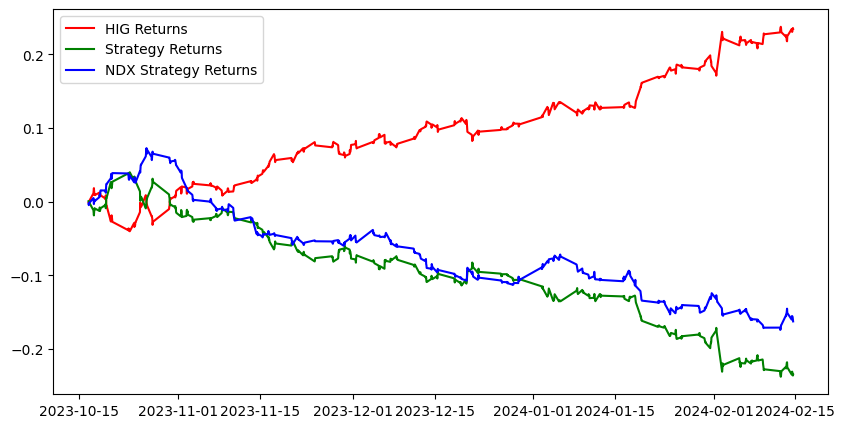

In [59]:
HIG_price_df['Predicted_Signal'] = model.predict(X)
HIG_price_df['HIG_returns'] = np.log(HIG_price_df['Close']/HIG_price_df['Close'].shift(1))
NDX_price_df['nq_returns'] = np.log(NDX_price_df['Close']/NDX_price_df['Close'].shift(1))
NDX_price_df['NDX_Predicted_Signal'] = model.predict(X1)

Cumulative_HIG_returns = np.cumsum(HIG_price_df[split:]['HIG_returns'])
HIG_price_df['Startegy_returns'] = HIG_price_df['HIG_returns']* HIG_price_df['Predicted_Signal'].shift(1)
NDX_price_df['NDX_Startegy_returns'] = NDX_price_df['nq_returns']* NDX_price_df['NDX_Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(HIG_price_df[split:]['Startegy_returns'])
Cumulative_NAX_returns = np.cumsum(NDX_price_df['Close']/NDX_price_df['Close'].shift(1))
Cumulative_NDXStrategy_returns = np.cumsum(NDX_price_df[split:]['NDX_Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_HIG_returns, color='r',label = 'HIG Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
#plt.plot(Cumulative_NAX_returns, color='y',label = 'ND Returns')
plt.plot(Cumulative_NDXStrategy_returns, color='b', label = 'NDX Strategy Returns')

plt.legend()
plt.show()

B.เพิ่ม feature (column) ต่างๆ ที่เราสนใจ จากนั้นให้ทำซ้ำตามข้อ (a.) แล้วแสดงผลลัพธ์ของกราฟเปรียบเทียบกับกราฟในข้อ a.

In [60]:
HIG_price_df1 = HIG_price_df.dropna()
# Calculate the 50-period simple moving average (SMA) for the 'Close' price
HIG_price_df1['SMA_50'] = HIG_price_df1['Close'].rolling(window=50).mean()
#fc_df1
# Calculate the 12-period EMA
ema_12 = HIG_price_df1['Close'].ewm(span=12, min_periods=12).mean()

# Calculate the 26-period EMA
ema_26 = HIG_price_df1['Close'].ewm(span=26, min_periods=26).mean()

# Calculate the MACD line
macd_line = ema_12 - ema_26

# Add MACD to DataFrame
HIG_price_df1['MACD'] = macd_line

HIG_price_df1 = HIG_price_df1.dropna()
#fc_df1

# Select features for X2 including RSI condition columns
#X2 = HIG_price_df1[['Open', 'High', 'Low', 'Close', 'Volume', 'S_14', 'Corr', 'RSI', 'Open-Close', 'Open-Open', 'SMA_50','MACD']]
X2 = HIG_price_df1[['Open', 'High', 'Low', 'Close', 'Volume', 'S_14', 'Corr', 'RSI', 'Open-Close','SMA_50','MACD']]
X2

<ipython-input-60-6d4852cfd9a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HIG_price_df1['SMA_50'] = HIG_price_df1['Close'].rolling(window=50).mean()
<ipython-input-60-6d4852cfd9a6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HIG_price_df1['MACD'] = macd_line


,Open,High,Low,Close,Volume,S_14,Corr,RSI,Open-Close,SMA_50,MACD
Datetime,,,,,,,,,,,
2023-01-18 15:30:00-05:00,75.230003,75.239998,74.959999,75.110001,427322,75.546022,0.530118,37.784893,-0.004997,76.332594,-0.280939
2023-01-19 09:30:00-05:00,74.690002,74.934998,73.864998,73.910004,403784,75.433879,0.748789,27.048924,-0.419998,76.232994,-0.386063
2023-01-19 10:30:00-05:00,73.900002,73.940002,73.445000,73.550003,177198,75.278879,0.845353,24.774671,-0.010002,76.140994,-0.492222
2023-01-19 11:30:00-05:00,73.550003,74.375000,73.535004,74.279999,170663,75.209593,0.902784,36.444027,0.000000,76.063194,-0.512432
2023-01-19 12:30:00-05:00,74.285004,74.385002,74.169998,74.375000,155189,75.116379,0.894646,37.796386,0.005005,75.984494,-0.514941
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-14 11:30:00-05:00,91.425003,91.514999,91.080002,91.095001,98766,90.860358,-0.694061,56.725064,-0.004997,90.254200,0.218405
2024-02-14 12:30:00-05:00,91.095001,91.274803,91.080002,91.269997,83672,90.827500,-0.630527,58.676518,0.000000,90.278800,0.237079
2024-02-14 13:30:00-05:00,91.288597,91.404999,91.139999,91.370003,120343,90.810714,-0.574720,59.792390,0.018600,90.308700,0.256986


In [61]:
y2 = np.where(HIG_price_df1['Close'].shift(-1) > HIG_price_df1['Close'],1,-1)

In [63]:
split = int(0.7*len(HIG_price_df1))
X2_train, X2_test, y2_train, y2_test = X2[:split], X2[split:], y2[:split], y2[split:]

In [66]:
model = LogisticRegression()
model = model.fit (X2_train,y2_train)

In [68]:
pd.DataFrame(zip(X2.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.00019910075964061123]
1,High,[-0.00020206462560583266]
2,Low,[-0.00019939630358960933]
3,Close,[-0.00020206212937500992]
4,Volume,[4.79848326601308e-07]
5,S_14,[-0.00019673844572390276]
6,Corr,[-4.116950643621205e-06]
7,RSI,[-0.00025514976285947544]
8,Open-Close,[-1.0814991560353152e-06]
9,SMA_50,[-0.00019366154109355007]


In [69]:
prediction_date = '2024-02-25'
probability = model.predict_proba(X2_test)
print(probability)

[[0.49832943 0.50167057]
 [0.47143545 0.52856455]
 [0.48855608 0.51144392]
 ...
 [0.51653058 0.48346942]
 [0.51141191 0.48858809]
 [0.49454524 0.50545476]]


In [70]:
predicted = model.predict(X2_test)
print(predicted)

[ 1  1  1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1
 -1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1 -1
  1  1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1
  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1
 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [71]:
print(metrics.confusion_matrix(y2_test, predicted))

[[218  53]
 [224  70]]


In [72]:
print(metrics.classification_report(y2_test, predicted))

              precision    recall  f1-score   support

          -1       0.49      0.80      0.61       271
           1       0.57      0.24      0.34       294

    accuracy                           0.51       565
   macro avg       0.53      0.52      0.47       565
weighted avg       0.53      0.51      0.47       565



In [74]:

HIG_price_df1['Predicted_Signal'] = model.predict(X2)
HIG_price_df1['HIG_returns1'] = np.log(HIG_price_df1['Close']/HIG_price_df1['Close'].shift(1))

Cumulative_HIG_returns = np.cumsum(HIG_price_df1[split:]['HIG_returns1'])

HIG_price_df1['Strategy_returns'] = HIG_price_df1['HIG_returns1']* HIG_price_df1['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(HIG_price_df1[split:]['Strategy_returns'])

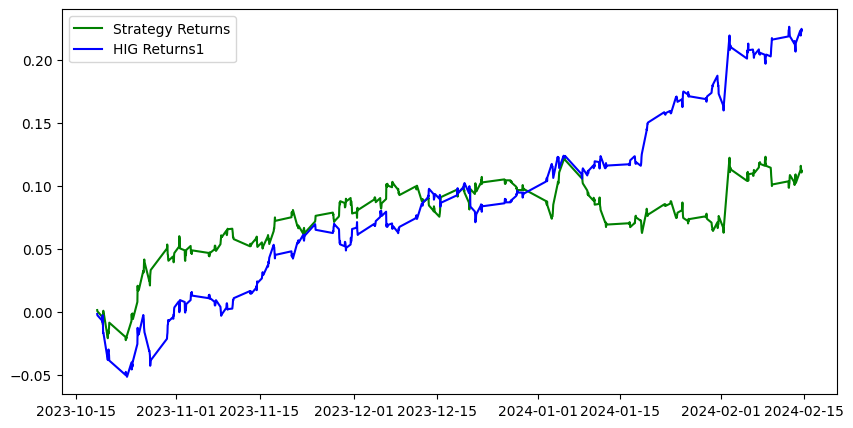

In [75]:
# show result
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_HIG_returns, color='b', label = 'HIG Returns1')
plt.legend()
plt.show()